<a href="https://colab.research.google.com/github/LujainOwaimer/Exercises/blob/main/OCR_Practice_Exercise_Lu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Practice Exercise

In this exercise, you will work on Optical Character Recognition (OCR) using the Keras OCR library.
Your task is to detect and recognize text from images. This notebook will guide you through the process of setting up the environment, loading and preprocessing images, applying the OCR model, and displaying the results.

## Objectives
- Set up the environment and install necessary libraries.
- Load and preprocess images for OCR.
- Apply the Keras OCR model to detect and recognize text.
- Display and analyze the OCR results.

This exercise is designed to help you understand the OCR pipeline, from image preprocessing to text recognition, and prepare you for the practical exam.
The example image can be found under `Datasets/OCR_Example`.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install tensorflow==2.9.1

In [3]:
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

## Install Libraries

In [4]:
!pip install pytesseract
!pip install easyocr
!pip install keras-ocr

In [5]:
!pip install keras==2.9.0

## Import necessary libraries
In this step, you can import these libraries to help you:
- `keras_ocr`
- `matplotlib.pyplot`
- `keras_ocr.pipeline.Pipeline`
- `opencv`
- `numpy`

You can use any other libraries

In [6]:
import cv2
import pytesseract
import easyocr
import keras_ocr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Download and visualize sample image
Here we will be downloading the image for OCR.

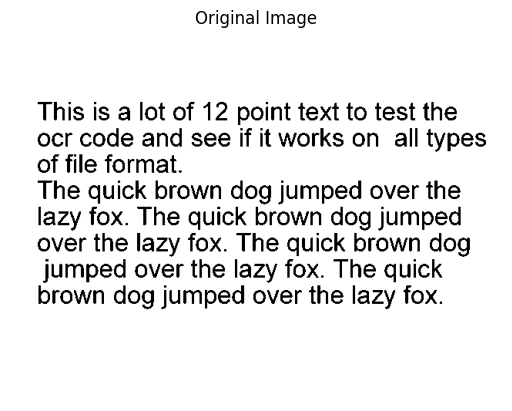

In [7]:
# Load the image
image_path = '/content/drive/MyDrive/OCR_example.png'
image = keras_ocr.tools.read(image_path)

# Display the image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()


## Preprocess the image
This step involves converting the images into a format suitable for OCR, using OpenCV and standard preprocessing techniques such as resizing and color conversion.

### Convert to grayscale

In [8]:
# Grayscale conversion
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Remove noise

In [9]:
# Noise removal
def remove_noise(image):
    return cv2.medianBlur(image, 5)

### Sharpen the image

In [10]:
# Sharpening
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])  # Sharpening kernel
    return cv2.filter2D(image, -1, kernel)


### Binarize the image

In [11]:
# Binarization
def binarize_image(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# Helper display function
def display_image(image, title, is_rgb=False):
    if is_rgb:
        # OpenCV loads images in BGR format by default, so we have to convert BGR to RGB for proper color display
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

## Display preprocessed images
Display the preprocessed images .

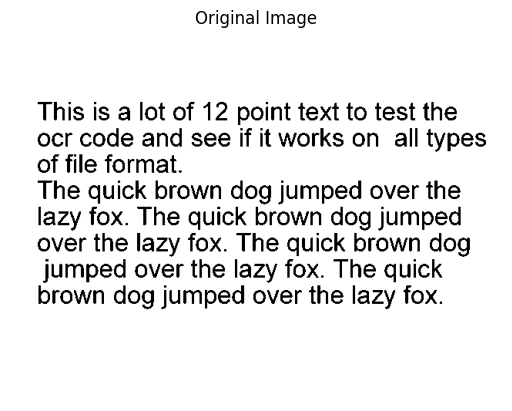

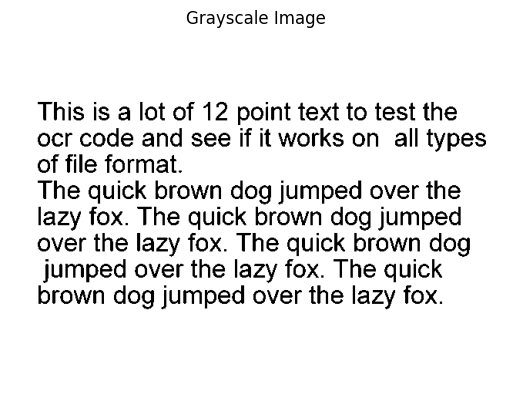

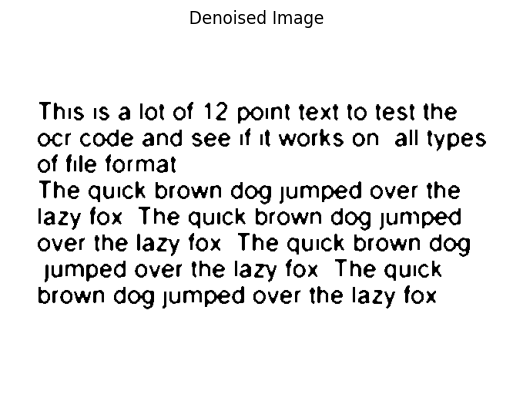

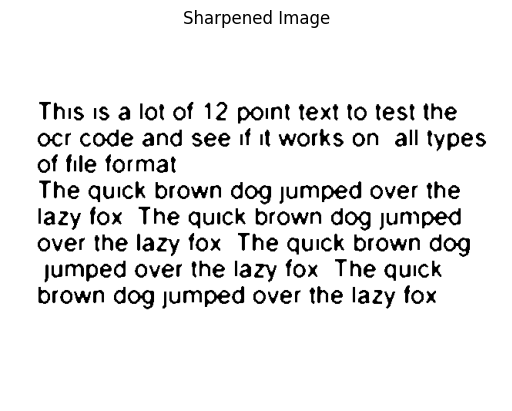

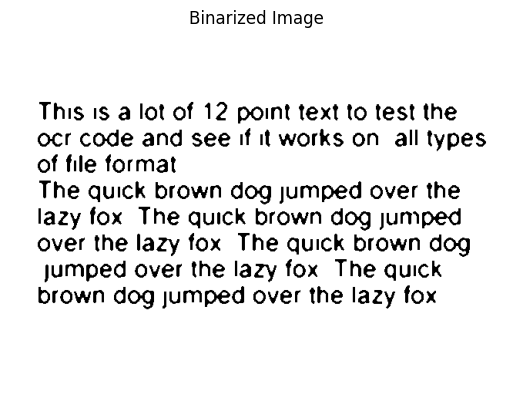

In [12]:
image_path = '/content/drive/MyDrive/OCR_example.png'
image = cv2.imread(image_path)

display_image(image, "Original Image",  is_rgb=True)

gray_image = get_grayscale(image)
display_image(gray_image, "Grayscale Image")


denoised_image = remove_noise(gray_image)
display_image(denoised_image, "Denoised Image")


sharpened_image = sharpen_image(denoised_image)
display_image(sharpened_image, "Sharpened Image")


binarized_image = binarize_image(sharpened_image)
display_image(binarized_image, "Binarized Image")

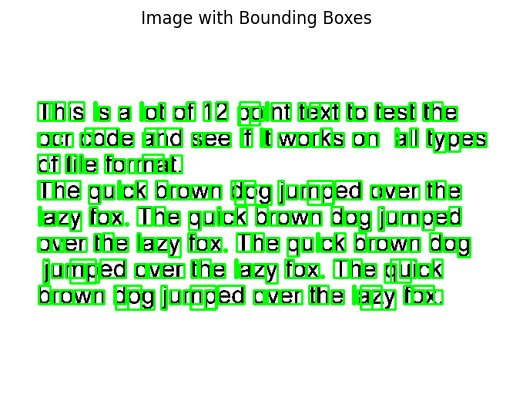

In [13]:
image_path = '/content/drive/MyDrive/OCR_example.png'
image = cv2.imread(image_path)

boxes = pytesseract.image_to_boxes(gray_image)
boxes_image = image.copy()

for box in boxes.splitlines():
    box = box.split(' ')
    x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    cv2.rectangle(boxes_image, (x, boxes_image.shape[0] - y), (w, boxes_image.shape[0] - h), (0, 255, 0), 2)

display_image(boxes_image, "Image with Bounding Boxes", is_rgb=True)

In [14]:
# Apply any type of preprocessing if needed
gray_image = get_grayscale(image)

extracted_text = pytesseract.image_to_string(gray_image)
print(extracted_text)

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



In [15]:
reader = easyocr.Reader(['en'])

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [16]:
image_path = '/content/drive/MyDrive/OCR_example.png'
image = cv2.imread(image_path)

result = reader.readtext(image)

print (result)

[([[33, 84], [587, 84], [587, 127], [33, 127]], 'This is a lot of 12 point text to test the', 0.7754540226573802), ([[31, 121], [485, 121], [485, 157], [31, 157]], 'ocr code and see if it works on', 0.9170070927018071), ([[495, 123], [625, 123], [625, 163], [495, 163]], 'all types', 0.9808697789159972), ([[31, 154], [227, 154], [227, 191], [31, 191]], 'of file format:', 0.8836455415214207), ([[32, 184], [592, 184], [592, 233], [32, 233]], 'The quick brown dog jumped over the', 0.5437342921802659), ([[29, 220], [591, 220], [591, 265], [29, 265]], 'lazy fox The quick brown dog jumped', 0.817800940967568), ([[31, 255], [605, 255], [605, 299], [31, 299]], 'over the lazy fox. The quick brown dog', 0.7768969943409993), ([[39, 287], [568, 287], [568, 332], [39, 332]], 'jumped over the lazy fox. The quick', 0.44818092135501436), ([[32, 321], [568, 321], [568, 369], [32, 369]], 'brown dog jumped over the lazy fox.', 0.7693259051024358)]


In [17]:
for detection in result:
    print(detection[1])

This is a lot of 12 point text to test the
ocr code and see if it works on
all types
of file format:
The quick brown dog jumped over the
lazy fox The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


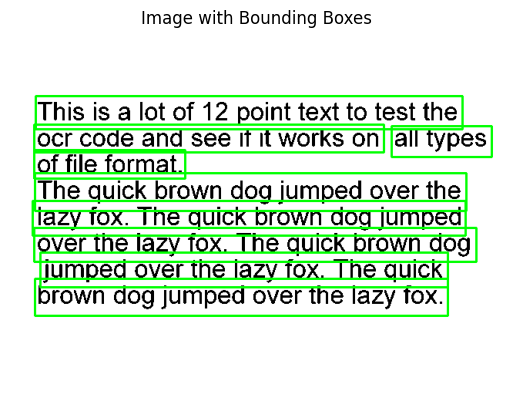

In [18]:
# Draw bounding Box
for detection in result:
    bounding_box = detection[0]

    top_left = tuple([int(coord) for coord in bounding_box[0]])
    bottom_right = tuple([int(coord) for coord in bounding_box[2]])


    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

display_image(image, "Image with Bounding Boxes", is_rgb=True)

## Get the OCR model using keras_ocr
Create a keras_ocr pipeline, to handle text detection and recognition using pre-trained model.

In [19]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.9.1
Keras version: 2.9.0


In [20]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## Perform OCR on the image
Runs the OCR pipeline on the preprocessed image and extracts text.

In [21]:
image_path = '/content/drive/MyDrive/OCR_example.png'

image = keras_ocr.tools.read(image_path)

# KerasOCR requires the image to be passed as a list, even if you're working with a single image
images = [image]

# Perform OCR on the image
prediction_groups = pipeline.recognize(images)

# Print the recognized text
for predictions in prediction_groups:
    for prediction in predictions:
        print(prediction[0])

2/2 [==============================] - 10s 4s/step
12
this
of
point
the
is
lot
text
to
test
a
code
and
if
it
works
all
types
see
ocr
on
of
format
file
the
quick
brown
dog
jumped
the
over
the
quick
dog
jumped
fox
brown
lazy
the
the
quick
dog
lazy
fox
brown
over
quick
jumped
the
the
fox
lazy
over
dog
jumped
the
fox
brown
lazy
over


## Display the OCR predictions
The predictions made by the keras_ocr pipeline are stored in a variable. You should inspect the recognized text and do the following:
* You should print the detected texts in the image.
* You can also use `keras_ocr.tools.drawAnnotations()` to visualize the extracted text.

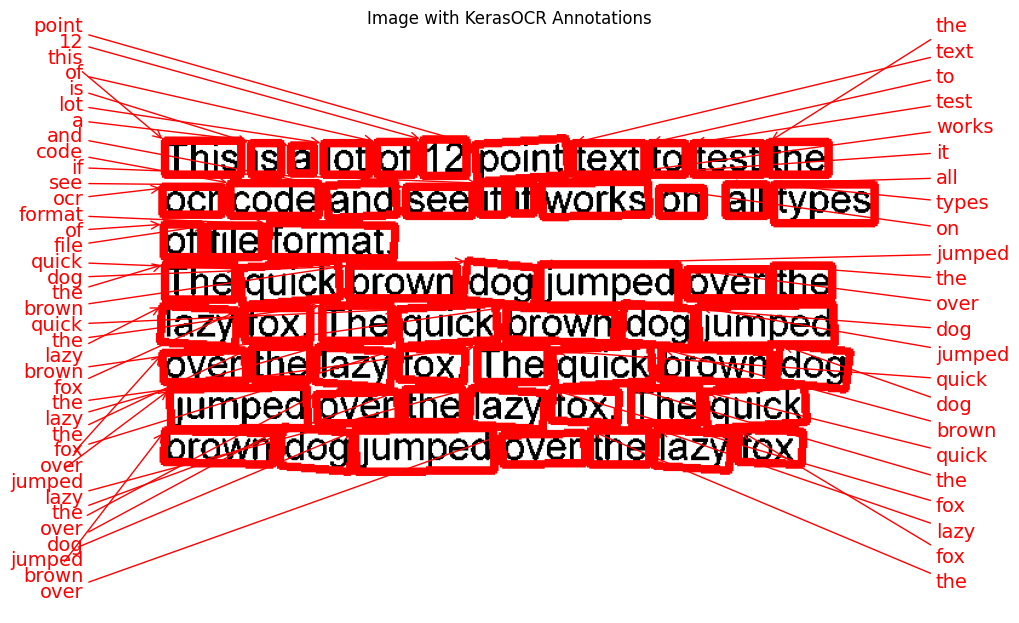

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0], ax=ax)


plt.title("Image with KerasOCR Annotations")
plt.axis('off')
plt.show()